In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ch
ch.set_ch()

In [3]:
import pandas as pd

In [4]:
payNum = pd.read_csv('part-00000', sep='\t', header=None, encoding='gbk')

In [5]:
pay_num_table = payNum.iloc[:, :].set_index([1, 0]).unstack().dropna()

In [6]:
pay_num_table.columns = pay_num_table.columns.get_level_values(1)

In [7]:
pay_num_table.index = pay_num_table.index.map(pd.Timestamp)

In [8]:
# pay_num_table['w'] = pay_num_table.index.weekday
# pay_num_table['d'] = pay_num_table.index.dayofyear

In [9]:
pay_num_table.index.name=None
pay_num_table.columns.name=None

In [10]:
pay_num_table.head()

,个人护理,中餐,休闲茶饮,休闲食品,便利店,其他美食,小吃,快餐,本地购物,汤/粥/煲/砂锅/炖菜,火锅,烘焙糕点,烧烤,网吧网咖,美容美发,药店,超市
2016-08-04,36.0,82.125000,111.426667,78.254237,148.014778,82.534884,79.864662,135.679032,114.0,126.833333,76.939394,100.727273,66.444444,66.5,48.0,35.0,169.292818
2016-08-05,34.0,88.513889,133.960526,88.239669,155.117647,96.860465,90.351145,152.496785,163.0,134.500000,88.393939,108.200000,80.111111,76.5,62.0,35.0,202.451791
2016-08-06,33.0,92.438356,113.673203,89.016393,99.631841,99.395349,80.223881,129.930979,225.0,80.666667,102.882353,105.100000,95.888889,91.0,73.0,42.0,242.906849
2016-08-07,44.0,90.273973,113.506579,89.811475,92.611940,98.318182,80.704545,123.488746,198.0,66.166667,99.088235,106.109091,102.222222,98.0,65.0,39.5,250.578082
2016-08-08,26.0,80.583333,93.185430,86.225000,152.099502,88.704545,82.007519,120.782400,145.0,143.000000,78.575758,104.445455,68.111111,72.0,70.0,40.5,184.021918


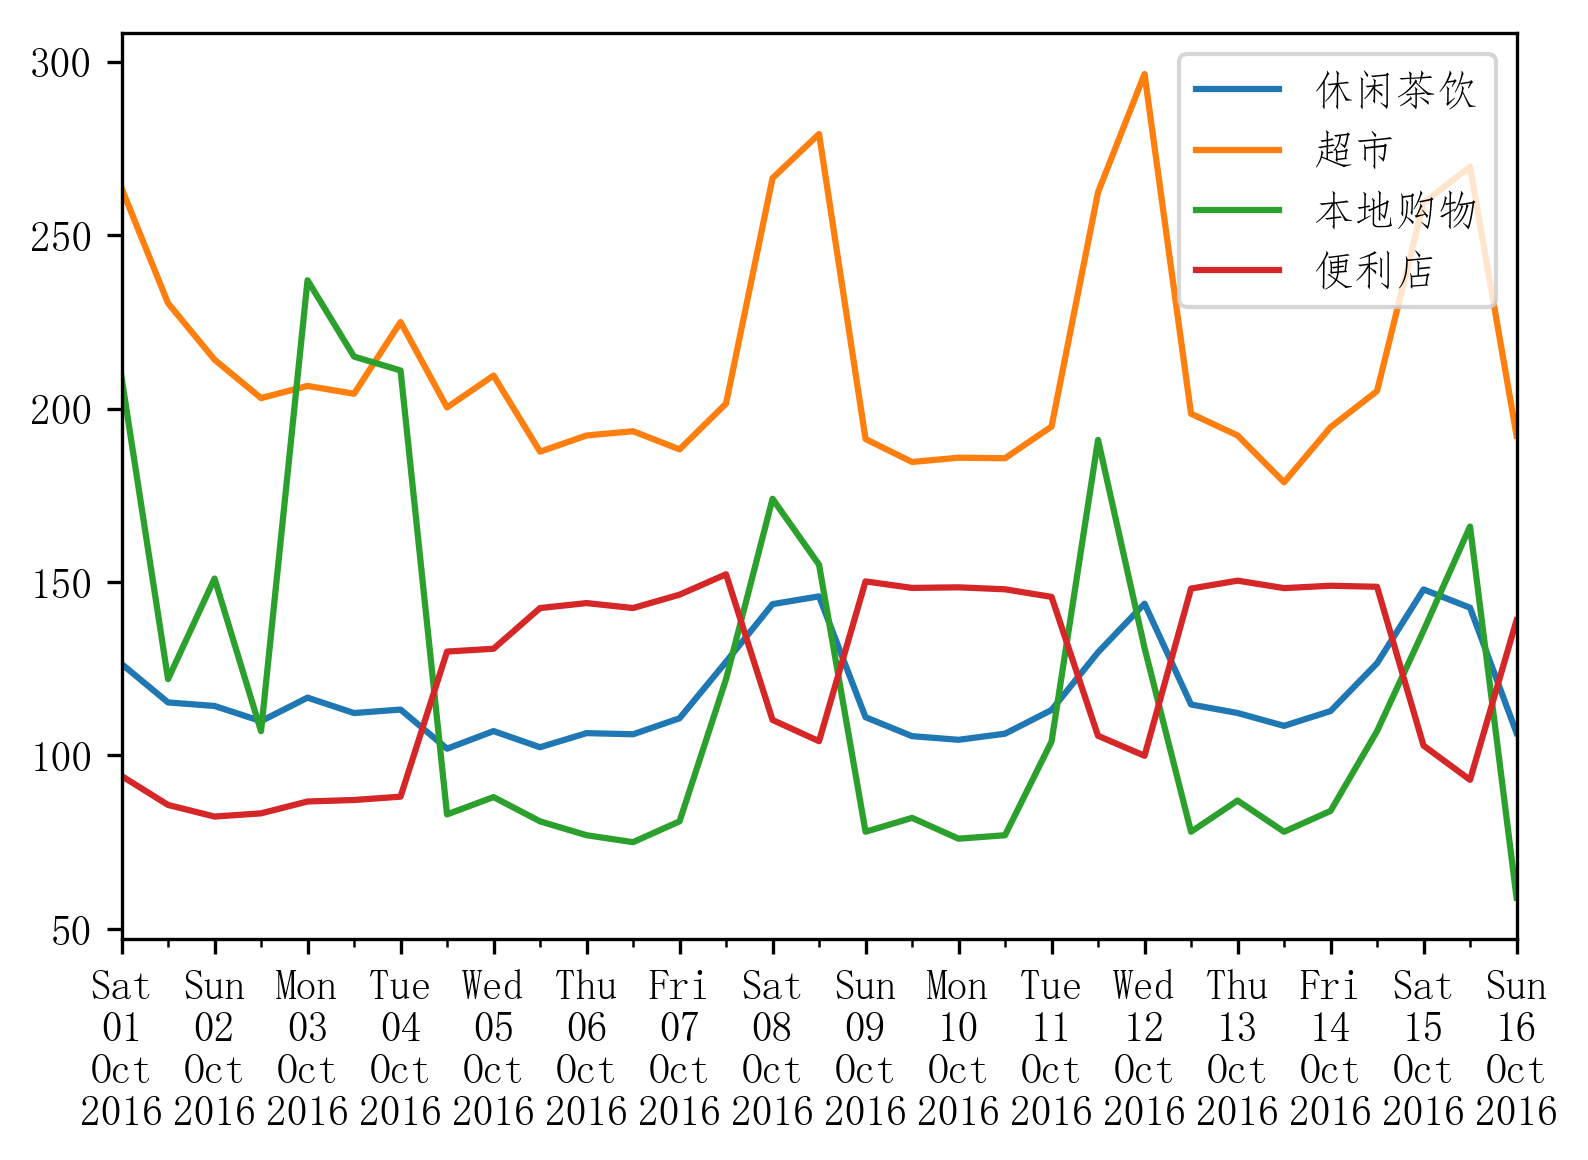

In [13]:
want_data = pay_num_table.iloc[-31:,:][['休闲茶饮', '超市', '本地购物', '便利店']]

ax = plt.figure(figsize=(6,4), dpi=300).add_subplot(111)
xticks = want_data.index
want_data.plot(ax=ax, style='-', label='second line',
                xticks=xticks.to_pydatetime())
ax.set_xticks([d for i, d in enumerate(xticks.to_pydatetime()) if i%2==0])
ax.set_xticklabels([x.strftime('%a\n%d\n%h\n%Y') for i, x in enumerate(xticks)]);
# remove the minor xtick labels set by pandas.plot 
ax.set_xticklabels([], minor=True)
plt.show()
ax.get_figure().savefig('Oct.png')